In [1]:
import os
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 让图片中可以显示中文
plt.rcParams['font.sans-serif'] = 'SimHei'
# 让图片中可以显示负号
plt.rcParams['axes.unicode_minus'] = False



In [16]:
df = pd.read_csv("orders.csv")
df.head()

订单编号    订单金额        订单日期  客户类型 客户来源渠道 客户地区 产品类别  配送时间 是否退货
0  ORD00001  815.51  2023-09-02  普通客户   线上渠道   西安   电脑     8    是
1  ORD00002  651.16  2022-05-13  普通客户   线下渠道   武汉   图书     6    是
2  ORD00003  745.78  2021-11-24  普通客户   线下渠道   广州   玩具     4    是
3  ORD00004  449.52  2021-09-13   VIP   线下渠道   上海   图书     4    是
4  ORD00005  625.20  2023-08-14  普通客户   线下渠道   深圳   家电     6    否

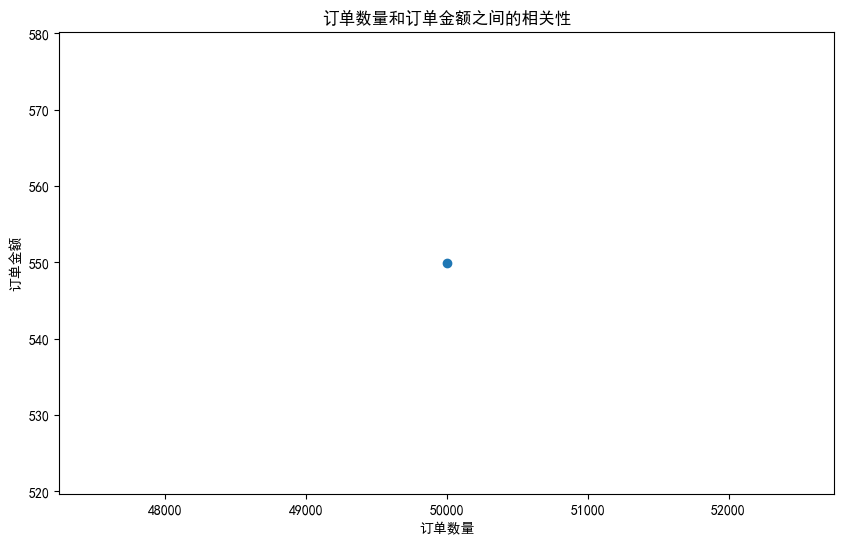

In [56]:
order_count = df["订单编号"].count()
# L = []
# for i in range(0,100):
# 	L.append(order_count)

# order_count = np.array(L)
# order_money = pd.DataFrame(df["订单金额"].head(100))
# order_money["订单数量"] = L
# order_money.订单金额.to_frame().corrwith(order_money.订单数量)


order_mean = df["订单金额"].mean()
plt.figure(figsize=(10, 6))
plt.scatter(order_count,order_mean)
plt.xlabel('订单数量')
plt.ylabel('订单金额')
plt.title('订单数量和订单金额之间的相关性')
plt.show()



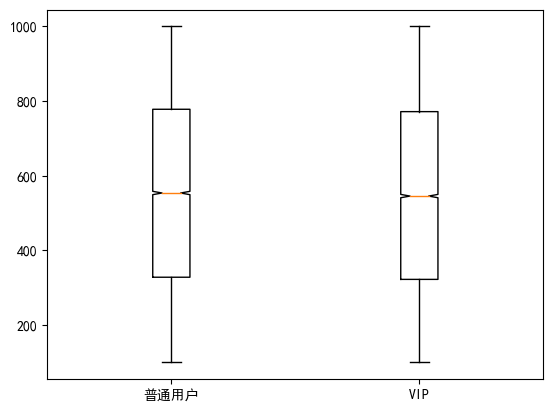

In [70]:
normal = df.loc[df["客户类型"]=="普通客户","订单金额"]
vip = df.loc[df["客户类型"]=="VIP","订单金额"]
plt.boxplot([normal.values,vip.values], notch=True, sym="go",labels=["普通用户","VIP"])
plt.show()

In [72]:
df['订单日期'] = pd.to_datetime(df['订单日期'],format="%Y-%m-%d")
# 添加列，方便后面数据分析
df['Month'] = df['订单日期'].dt.month
df['Day'] = df['订单日期'].dt.day
df['Dayofweek'] = df['订单日期'].dt.dayofweek
df

订单编号    订单金额       订单日期  客户类型 客户来源渠道 客户地区 产品类别  配送时间 是否退货  Month  \
0      ORD00001  815.51 2023-09-02  普通客户   线上渠道   西安   电脑     8    是      9   
1      ORD00002  651.16 2022-05-13  普通客户   线下渠道   武汉   图书     6    是      5   
2      ORD00003  745.78 2021-11-24  普通客户   线下渠道   广州   玩具     4    是     11   
3      ORD00004  449.52 2021-09-13   VIP   线下渠道   上海   图书     4    是      9   
4      ORD00005  625.20 2023-08-14  普通客户   线下渠道   深圳   家电     6    否      8   
...         ...     ...        ...   ...    ...  ...  ...   ...  ...    ...   
49995  ORD49996  951.09 2019-09-15   VIP   线上渠道   成都   家具     7    是      9   
49996  ORD49997  583.95 2020-09-28   VIP   线上渠道   南京  化妆品     3    否      9   
49997  ORD49998  123.57 2023-03-17  普通客户   线上渠道   南京   家电     4    是      3   
49998  ORD49999  464.08 2022-06-11  普通客户   线上渠道   成都  化妆品     8    否      6   
49999  ORD50000  830.06 2019-04-08  普通客户   线上渠道   广州   食品     1    否      4   

       Day  Dayofweek  
0        2          5  
1       13          4  
2       24          2  
3       13          0  
4       14          0  
...    ...        ...  
49995   15          6  
49996   28          0  
49997   17          4  
49998   11          5  
49999    8          0  

[50000 rows x 12 columns]

<AxesSubplot:xlabel='产品类别'>

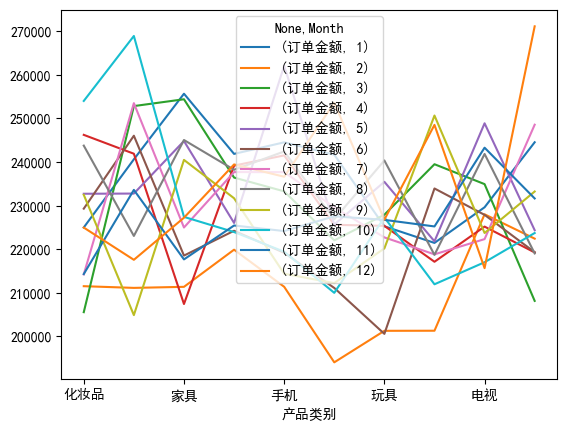

In [89]:
top_10_product = df.groupby("产品类别")[["订单金额"]].sum().sort_values("订单金额",ascending=False).head(10)
sale_product = df.loc[df["产品类别"].isin(top_10_product.index) ].groupby(["产品类别","Month"])[["订单金额"]].sum().unstack()

sale_product.plot()

<AxesSubplot:xlabel='客户来源渠道'>

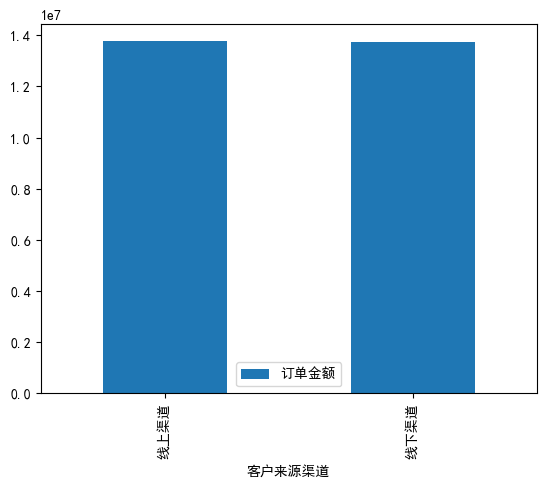

In [91]:
df.groupby("客户来源渠道")[["订单金额"]].sum().plot.bar()

<AxesSubplot:xlabel='客户地区'>

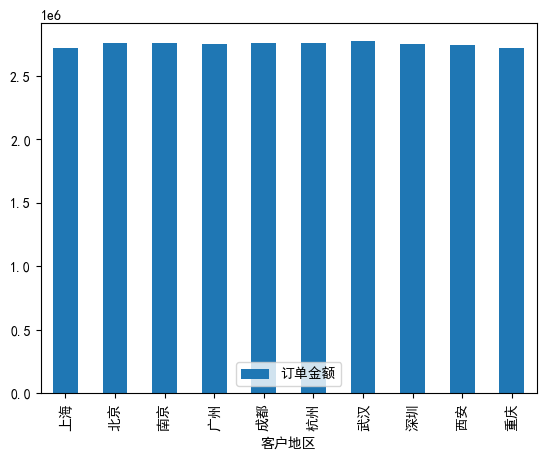

In [92]:
df.groupby("客户地区")[["订单金额"]].sum().plot.bar()

{'whiskers': [<matplotlib.lines.Line2D at 0x202e29a7a60>,
 'caps': [<matplotlib.lines.Line2D at 0x202e29a7ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x202e29a7850>,
 'medians': [<matplotlib.lines.Line2D at 0x202e29b1580>,
 'fliers': [<matplotlib.lines.Line2D at 0x202e29b1790>,
 'means': []}

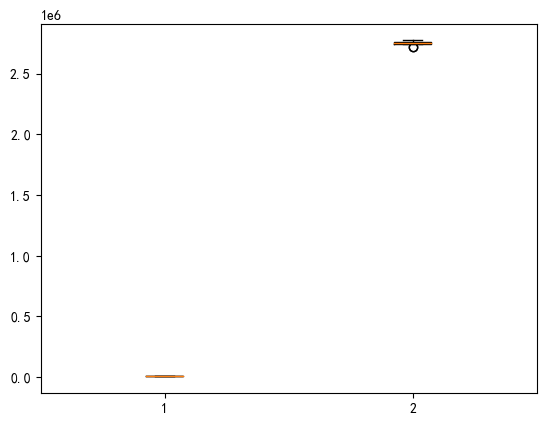

In [101]:
data1 = df.groupby("客户地区").agg({"订单编号":"count","订单金额":"sum"})
data1.rename(columns={"订单编号":"订单数量"},inplace=True)
plt.boxplot(data1)

([<matplotlib.patches.Wedge at 0x202e0e0c130>,
 [Text(1.0452765137016293, 0.3426324705916932, '图书'),
  Text(0.6451198722038819, 0.8909659648312316, '家电'),
  Text(0.001131287224950173, 1.0999994182676711, '手机'),
  Text(-0.6476225148676882, 0.8891485130373054, '化妆品'),
  Text(-1.0478936391759326, 0.33454285371925163, '家具'),
  Text(-1.0454049989856837, -0.34224024908789236, '食品'),
  Text(-0.6489263357932212, -0.8881973940031481, '电视'),
  Text(-0.006053044626305153, -1.0999833456242654, '电脑'),
  Text(0.6393668910958126, -0.8951033340181878, '服装'),
  Text(1.044949292022734, -0.3436291272595898, '玩具')],
 [Text(0.7602011008739122, 0.24918725133941325, '10.1%'),
  Text(0.46917808887555046, 0.6479752471499866, '9.9%'),
  Text(0.0008227543454183075, 0.7999995769219426, '10.0%'),
  Text(-0.470998192631046, 0.6466534640271311, '10.0%'),
  Text(-0.7621044648552237, 0.24330389361400118, '10.1%'),
  Text(-0.760294544716861, -0.248901999336649, '9.8%'),
  Text(-0.4719464260314336, -0.6459617410931986, 

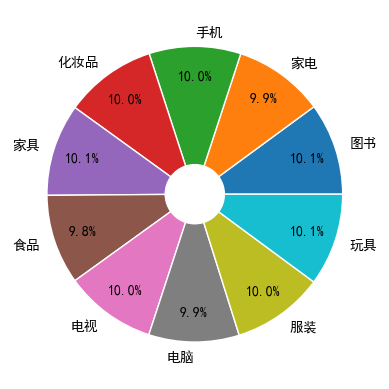

In [121]:
product_order_count = df["产品类别"].value_counts().to_frame()
return_data = df.loc[df["是否退货"]=="是"]["产品类别"].value_counts().to_frame()
new_data = product_order_count.merge(return_data,left_index=True,right_index=True)

new_data["退货率"] = new_data["产品类别_x"]/new_data["产品类别_y"]

plt.pie(
    x=new_data.退货率,  # 值
    autopct='%.1f%%',  # 百分比
    labels=new_data.index,  # 标签
    pctdistance=0.8,  # 百分比文字的位置
    # 字体样式
    textprops={'fontsize': 10, 'color': 'k'},
    # 甜甜圈设置
    wedgeprops={'width': 0.8, 'edgecolor': 'w'}
)

(array([10029.,  9898., 10099., 10226.,  9748.]),
 array([ 1. ,  2.8,  4.6,  6.4,  8.2, 10. ]),
 <BarContainer object of 5 artists>)

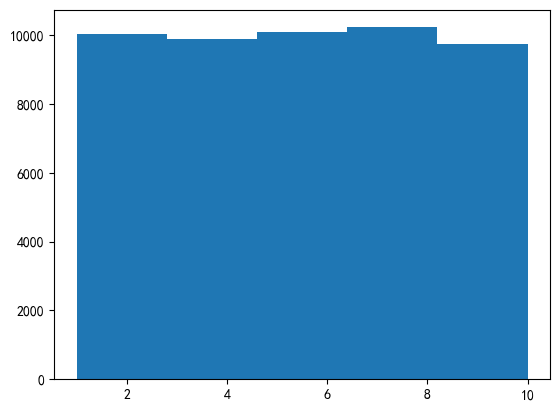

In [131]:
data2 = df["配送时间"]
plt.hist(data2, bins=5)

([<matplotlib.patches.Wedge at 0x202e2341f40>,
 [Text(1.046776620422963, 0.3380217551221821, '化妆品'),
  Text(0.6419603706214159, 0.893245141353489, '图书'),
  Text(-0.018505040753811097, 1.0998443360161019, '家具'),
  Text(-0.6673819716882969, 0.874414835112855, '家电'),
  Text(-1.0564101629855054, 0.30659022740612324, '手机'),
  Text(-1.0362721912082091, -0.3689714700739574, '服装'),
  Text(-0.6359281541205223, -0.8975496547806509, '玩具'),
  Text(-0.000856846246724606, -1.099999666279272, '电脑'),
  Text(0.6425596558496047, -0.8928141400506813, '电视'),
  Text(1.04556077097234, -0.3417640621887066, '食品')],
 [Text(0.7612920875803366, 0.24583400372522332, '9.9%'),
  Text(0.4668802695428479, 0.6496328300752647, '10.3%'),
  Text(-0.013458211457317161, 0.7998867898298923, '10.1%'),
  Text(-0.48536870668239773, 0.6359380619002581, '10.1%'),
  Text(-0.7682983003530948, 0.22297471084081688, '10.1%'),
  Text(-0.7536525026968793, -0.2683428873265145, '9.7%'),
  Text(-0.46249320299674346, -0.6527633852950188, '

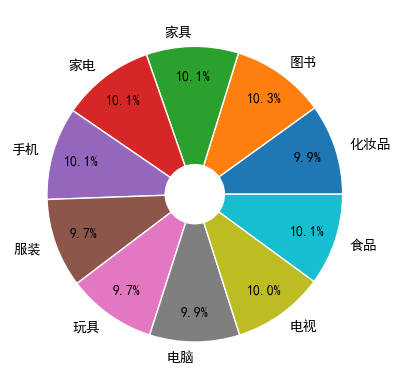

In [133]:
data3 = df.groupby("产品类别")[["订单金额"]].sum()
plt.pie(
    x=data3.订单金额,  # 值
    autopct='%.1f%%',  # 百分比
    labels=data3.index,  # 标签
    pctdistance=0.8,  # 百分比文字的位置
    # 字体样式
    textprops={'fontsize': 10, 'color': 'k'},
    # 甜甜圈设置
    wedgeprops={'width': 0.8, 'edgecolor': 'w'}
)